### Target

![](http://r-statistics.co/screenshots/ggplot_masterlist_10.png)

In [9]:
import pandas as pd
mtcars= pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv") 
mtcars['mpg_z']= ((mtcars['mpg'] - mtcars['mpg'].mean()))/mtcars['mpg'].std()

In [10]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_z
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0.150885
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0.150885
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0.449543
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0.217253
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,-0.230735


In [32]:
mean_mpg_z = mtcars['mpg_z'].mean()
mean_mpg_z

6.678685382510707e-16

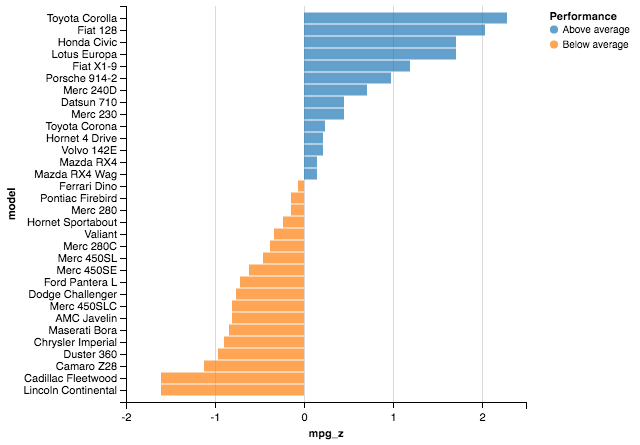

In [61]:
from altair import *
Chart(mtcars).mark_bar().encode(y=Y('model', sort=SortField(op='mean', order='descending', field='mpg_z')),
                                x=X('mpg_z', ),
                              color= Color('Performance:N')).transform_data(
   calculate=[Formula('Performance', expr.where(expr.df.mpg_z < mean_mpg_z,'Below average','Above average'))],
   
).configure_cell(height=100, width=400).configure_scale(bandSize=12) 

Todo

1. How to use mean of mpg_z in expression, if calculated on the fly? Like
expr.where(expr.df.mpg_z < expr.df.mpg_z.mean(),'Below average','Above average'))
